# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="../../Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.0


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

#### 4.1 Import the needed modules to train the agents with MADDPG 

In [6]:
import torch
import configparser
import matplotlib.pyplot as plt
from collections import deque

from maddpg import MADDPG

#### 4.2 Configer the Hyperparameter

In [7]:
# config settings
config = configparser.ConfigParser()
config.update_every = 1           # update rate
config.batch_size = 512           # minibatch size
config.buffer_size = int(1e6)     # replay buffer size
config.discount = 0.99            # discount factor
config.tau = 0.2                  # for soft update of target parameters
config.seed = 2                   # random seed
config.lr_actor = 1e-4            # learning rate of the actor
config.lr_critic = 1e-4           # learning rate of the critic
config.action_size = action_size  # Two continuous actions are available.
config.num_agents = num_agents    # There are 2 agents,
config.state_size = state_size    # each observes a state with length: 24 

maddpg = MADDPG(config)

#### 4.3 Print the actor and critic network defined in the model

In [8]:
print(maddpg.agents[0].actor_target)
print(maddpg.agents[0].critic_target)

Actor(
  (fc1): Linear(in_features=24, out_features=128, bias=True)
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=2, bias=True)
)
Critic(
  (fcs1): Linear(in_features=24, out_features=128, bias=True)
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=130, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=1, bias=True)
)


#### 4.4 Train the agents to play tennis

C:\Users\Master\.conda\envs\drlnd\lib\site-packages\torch\nn\functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode: 0	Average Score: 0.00	Critic Loss: 0.000000	Actor Loss: 0.000000	t_step       15  t_step:       15
Episode: 50	Average Score: 0.00	Critic Loss: 0.000015	Actor Loss: -0.005425	t_step      797  t_step:      797
Episode: 100	Average Score: 0.00	Critic Loss: 0.000034	Actor Loss: -0.000644	t_step     1558  t_step:     1558
Episode: 150	Average Score: 0.01	Critic Loss: 0.000033	Actor Loss: -0.007449	t_step     2432  t_step:     2432
Episode: 200	Average Score: 0.02	Critic Loss: 0.000059	Actor Loss: -0.008942	t_step     3341  t_step:     3341
Episode: 250	Average Score: 0.04	Critic Loss: 0.000086	Actor Loss: -0.015792	t_step     4626  t_step:     4626
Episode: 300	Average Score: 0.06	Critic Loss: 0.000124	Actor Loss: -0.021564	t_step     5840  t_step:     5840
Episode: 350	Average Score: 0.07	Critic Loss: 0.000136	Actor Loss: -0.030979	t_step     7571  t_step:     7571
Episode: 400	Average Score: 0.09	Critic Loss: 0.000166	Actor Loss: -0.041021	t_step     9476  t_step:     9476
Episo

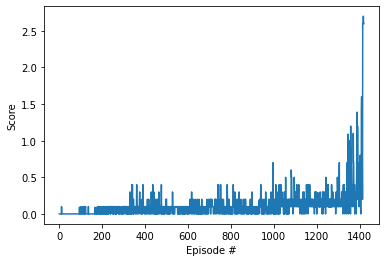

In [9]:
def train(n_episode=30000):
    """
    Function to train the agent
    """
    scores = []
    scores_window = deque(maxlen=100)
    for i_episode in range(n_episode):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        maddpg.reset()
        score = np.zeros(num_agents)
        while True:
            actions = maddpg.act(states)
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            maddpg.step(states, actions, rewards, next_states, dones)
            score += rewards
            states = next_states
            if np.any(dones):
                break
        max_score = np.max(score)
        scores_window.append(max_score)
        scores.append(max_score)
        print('\rEpisode: {}  Average Score: {:.2f}  Score: {:.2f}  Critic Loss: {:-7.6f}  Actor Loss: {:-7.6f}'
              '  t_step: {:-8d}'.
              format(i_episode, np.mean(scores_window), max_score, maddpg.loss[0], maddpg.loss[1], maddpg.t_step)\
              , end="")
        
        # periodic model checkpoint
        if i_episode % 50 == 0:
            torch.save(maddpg.agents[0].actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(maddpg.agents[0].critic_local.state_dict(), 'checkpoint_critic.pth')
            print('\rEpisode: {}\tAverage Score: {:.2f}\tCritic Loss: {:-7.6f}\tActor Loss: {:-7.6f}\tt_step {:-8d}'
                  .format(i_episode, np.mean(scores_window), maddpg.loss[0], maddpg.loss[1], maddpg.t_step))
            
        # Stopping the training after the avg score of >= 0.5 is reached
        if np.mean(scores_window) >= 0.5:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode,
                                                                                         np.mean(scores_window)))
            torch.save(maddpg.agents[0].actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(maddpg.agents[0].critic_local.state_dict(), 'checkpoint_critic.pth')
            break

    plt.plot(np.arange(1, len(scores)+1), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

train()

### 5 Load the model parameter and test the agents

Set train_mode=False

In [10]:
for agent in maddpg.agents:
    agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
    agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

#### 5.1 Let the agents play tennis

In [11]:
for i in range(1, 10):                             # play the game for 10 episodes
    env.reset(train_mode=False)[brain_name]        # reset the environment  
    states = env_info.vector_observations          # get the current states (for each agent)
    scores = np.zeros(num_agents)                  # initialize the score (for each agent)

    while True:
        actions = maddpg.act(states)                # select an action (for each agent)
        env_info = env.step(actions)[brain_name]    # send all actions to the environment
        next_states = env_info.vector_observations  # get next state (for each agent)        
        rewards = env_info.rewards                  # get reward (for each agent)
        dones = env_info.local_done                 # see if episode finished
        states = next_states                        # roll over state to next time step
        scores += env_info.rewards                  # update the score 
        if np.any(dones):                           # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

C:\Users\Master\.conda\envs\drlnd\lib\site-packages\torch\nn\functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Score (max over agents) from episode 1: 2.600000038743019
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 2.600000038743019
Score (max over agents) from episode 4: 2.7000000402331352
Score (max over agents) from episode 5: 2.600000038743019
Score (max over agents) from episode 6: 2.600000038743019
Score (max over agents) from episode 7: 2.600000038743019
Score (max over agents) from episode 8: 2.7000000402331352
Score (max over agents) from episode 9: 2.600000038743019


#### 5.2 Play the recorded tennis game

In [2]:
from IPython.display import HTML

HTML("""
<video width="640" height="360" controls>
  <source src="./media/game_set_match.mp4" type="video/mp4">
</video>
""")

### 6. Close the environment

When finished, you can close the environment.

In [13]:
env.close()